# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Цель:** проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Общая информация о данных

In [1]:
# Импорт используемых библиотек 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
display(calls.head())
calls.info()
print()
print('Явных дубликатов в датафрейме calls:', calls.duplicated().sum())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Явных дубликатов в датафрейме calls: 0


Датафрейм calls включает в себя 4 столбца и 202607 строк. Тип данных в столбце `call_date` следует заменить на datetime.

In [4]:
display(internet.head())
internet.info()
print()
print('Явных дубликатов в датафрейме internet:', calls.duplicated().sum())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Явных дубликатов в датафрейме internet: 0


Датафрейм internet включает в себя 5 столбцов и 149396 строк. Тип данных в столбце `session_date` следует заменить на datetime. Столбец `Unnamed: 0` дублирует номер записи, его позже можно будет удалить.

In [5]:
display(messages.head())
messages.info()
print()
print('Явных дубликатов в датафрейме messages:', calls.duplicated().sum())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Явных дубликатов в датафрейме messages: 0


Датафрейм messages включает в себя 3 столбца и 123036 строк. Тип данных в столбце `message_date` следует заменить на datetime.

In [6]:
display(tariffs.head())
tariffs.info()
print()
print('Явных дубликатов в датафрейме tariffs:', calls.duplicated().sum())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes

Явных дубликатов в датафрейме tariffs: 0


Датафрейм tariffs включает в себя 8 столбцов и 2 строки. В нем описаны параметры тарифов ultra и smart.

In [7]:
display(users.head())
users.info()
print()
print('Явных дубликатов в датафрейме users:', calls.duplicated().sum())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Явных дубликатов в датафрейме users: 0


Датафрейм users включает в себя 8 столбцов и 500 строк. Тип данных в столбцах `reg_date` и `churn_date` следует заменить на datetime. 

В столбце `churn_date` много пропусков. В этом столбце указана дата, когда пользователь перестал пользоваться тарифом. Пропущенные значения говорят о том, что пользователь еще не переставал пользоваться услугами, поэтому эти пропуски нам не мешают.

Ни в одной из таблиц не найдено явных дубликатов.

## Предобработка данных

In [13]:
# Приведем столбцы с датами к типу datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format ='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format ='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format ='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format ='%Y-%m-%dT%H:%M:%S')

In [14]:
# Удалим лишний столбец из датафрейма internet

internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


## Анализ поведения пользователей внутри тарифа

### Количество начатых звонков и израсходованных минут

На этом шаге получим количество и общую длительность звонков для каждого пользователя по месяцам.

In [15]:
# Добавим столбец с номером месяца 

calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


По условию задания, "Мегалайн всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута". Поэтому округлим минуты разговора в большую сторону, используя numpy:

In [16]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Далее необходимо сгруппировать звонки по уникальным идентификаторам пользователей и месяцу, посчитав количество звонков и общую длительность разговоров. Также избавимся от пропущенных вызовов, которые отмечаются нулевой длительностью.

In [17]:
calls_grouped = (
calls
.query('duration != 0')
.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
.reset_index()
)

calls_grouped.columns = calls_grouped.columns.droplevel([-1]) # Уберем мультииндексы

calls_grouped = calls_grouped.rename(columns={'count':'calls_total', 'sum':'total_duration'}) # Укажем понятные названия столбцов

calls_grouped

,user_id,month,calls_total,total_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612


### Количество отправленных сообщений

На этом шаге получим количество отправленных сообщений для каждого пользователя по месяцам.

In [18]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [19]:
messages_grouped = (
messages
.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
.reset_index()
)

messages_grouped = messages_grouped.rename(columns={'message_date':'messages_total'})

messages_grouped

,user_id,month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Объем израсходованного интернет-трафика

На этом шаге получим объем израсходованного интернет-трафика для каждого пользователя по месяцам.

In [20]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [21]:
internet_grouped = (
internet
.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
.reset_index()
)
internet_grouped

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


### Расчет помесячной выручки с каждого пользователя

Объединим данные, полученные в предыдущих пунктах, в один датафрейм:

In [22]:
users_info = users[['user_id', 'tariff', 'city']] # Вспомогательная таблица с тарифом и городом пользователей

In [23]:
data = (calls_grouped
.merge(messages_grouped, on=['user_id', 'month'], how='outer')
.merge(internet_grouped, on=['user_id', 'month'], how='outer')
.merge(users_info, on=['user_id'], how='outer')
)

data

,user_id,month,calls_total,total_duration,messages_total,mb_used,tariff,city
0,1000,5.0,17.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19559.44,smart,Санкт-Петербург
3212,1489,11.0,NaN,NaN,20.0,17491.56,smart,Санкт-Петербург
3213,1489,12.0,NaN,NaN,35.0,17322.51,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   calls_total     3168 non-null   float64
 3   total_duration  3168 non-null   float64
 4   messages_total  2717 non-null   float64
 5   mb_used         3203 non-null   float64
 6   tariff          3216 non-null   object 
 7   city            3216 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


Получился датафрейм из 3216 строк и 8 столбцов. Заметно, что в таблице имеются пропуски значений в столбце с количеством звонков, а также в столбце с месяцем (всего два случая, возможно ошибка в данных). Получается, что пользователи с NaN звонков в определенные месяцы не совершали. Далее заменим NaN на 0, а строки с NaN в месяце просто удалим, т.к. их всего две, и на анализ это не повлияет.

In [25]:
data.isna().mean()

user_id           0.000000
month             0.000622
calls_total       0.014925
total_duration    0.014925
messages_total    0.155162
mb_used           0.004042
tariff            0.000000
city              0.000000
dtype: float64

In [26]:
data = data.fillna(0).query('month != 0')
display(data.isna().mean())
data

user_id           0.0
month             0.0
calls_total       0.0
total_duration    0.0
messages_total    0.0
mb_used           0.0
tariff            0.0
city              0.0
dtype: float64

,user_id,month,calls_total,total_duration,messages_total,mb_used,tariff,city
0,1000,5.0,17.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,28.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7.0,41.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8.0,42.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9.0,46.0,466.0,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11050.56,smart,Санкт-Петербург
3210,1489,9.0,0.0,0.0,32.0,17206.30,smart,Санкт-Петербург
3211,1489,10.0,0.0,0.0,21.0,19559.44,smart,Санкт-Петербург
3212,1489,11.0,0.0,0.0,20.0,17491.56,smart,Санкт-Петербург


Для расчета прибыли сначала объединим полученную таблицу с таблицей данных о тарифах и лимитах. Затем напишем функцию, которая будет рассчитывать выручку с каждого пользователя по месяцам.

In [27]:
data = data.rename(columns={'tariff':'tariff_name'})

In [28]:
full_data = data.merge(tariffs, on=['tariff_name'], how='outer')
full_data

,user_id,month,calls_total,total_duration,messages_total,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,17.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,28.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,41.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,42.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,46.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11050.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,9.0,0.0,0.0,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,10.0,0.0,0.0,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,11.0,0.0,0.0,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3


In [29]:
def revenue_calculation(row):
    messages_revenue = (row['messages_total'] - row['messages_included']) * row['rub_per_message'] \
    if row['messages_total'] > row['messages_included'] else 0
    minutes_revenue = (row['total_duration'] - row['minutes_included']) * row['rub_per_minute'] \
    if row['total_duration'] > row['minutes_included'] else 0
    mb_revenue = math.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb'] \
    if row['mb_used'] > row['mb_per_month_included'] else 0
    return messages_revenue + minutes_revenue + mb_revenue + row['rub_monthly_fee']

full_data['revenue'] = full_data.apply(revenue_calculation, axis=1)
full_data.describe()

,user_id,month,calls_total,total_duration,messages_total,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,50.713752,451.244866,38.281269,17207.612859,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,1529.076229
std,144.659172,2.905413,26.951413,241.909978,36.148326,7570.958771,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,798.251091
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,550.000000
25%,1125.000000,6.000000,32.000000,282.000000,9.000000,12491.890000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,750.000000
50%,1253.000000,9.000000,50.000000,443.000000,30.000000,16943.175000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,1653.500000
75%,1378.750000,11.000000,66.000000,589.000000,57.000000,21424.625000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,1950.000000
max,1499.000000,12.000000,190.000000,1673.000000,224.000000,49745.690000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6770.000000


In [30]:
full_data

,user_id,month,calls_total,total_duration,messages_total,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,17.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,28.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,41.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,42.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,46.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11050.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,550.0
3210,1489,9.0,0.0,0.0,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,950.0
3211,1489,10.0,0.0,0.0,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1550.0
3212,1489,11.0,0.0,0.0,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1150.0


In [31]:
data_ultra = full_data.query('tariff_name == "ultra"') # Выделим из полученного датафрейма только пользователей тарифа ultra
data_ultra.describe()

,user_id,month,calls_total,total_duration,messages_total,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,59.236548,526.623350,49.363452,19468.805208,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.152284
std,140.694908,2.871762,35.562722,317.606098,47.804457,10087.170752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,33.000000,284.000000,6.000000,11770.260000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,58.000000,518.000000,38.000000,19308.010000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,84.000000,752.000000,79.000000,26837.690000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,190.000000,1673.000000,224.000000,49745.690000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


In [32]:
data_smart = full_data.query('tariff_name == "smart"') # То же самое для пользователей тарифа smart
data_smart.describe()

,user_id,month,calls_total,total_duration,messages_total,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,46.947510,417.934948,33.384029,16208.386990,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1289.973531
std,146.119496,2.920316,21.039171,190.313730,28.227876,5870.476681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,32.000000,282.000000,10.000000,12643.010000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,9.000000,47.000000,422.000000,28.000000,16506.840000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1023.000000
75%,1376.000000,11.000000,61.000000,545.000000,51.000000,20042.930000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,12.000000,162.000000,1435.000000,143.000000,38552.450000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


Данные имеют выбросы, поэтому сравним медианы прибыли.

- Пользователи тарифа `smart` чаще уходят за лимиты своего тарифа. Медианное значение выручки с пользователей данного тарифа - **958** рублей, что почти в два раза выше абонентской платы в 550 рублей. Пользователи тарифа `ultra`, наоборот, совсем редко уходят за лимиты. Медианное значение выручки с пользователей тарифа ultra равно абонентской плате за тариф - **1950** рублей.

- По израсходованным минутам и смс пользователи обоих тарифов выходят за лимиты редко или вообще никогда.

- Пользователи `smart` сильно переплачивают за интернет: они часто превышают лимит по гигабайтам на 1 - 5 гб, а в отдельных случаях на целых 23 гб. Один гигабайт сверх лимита стоит 200 рублей, отсюда и выручка.

In [33]:
# check
full_data['revenue'].sum()

4914451.0

In [34]:
# check
full_data[full_data['total_duration'] > 500][['user_id', 'month', 'total_duration', 'messages_total',
       'mb_used', 'tariff_name', 'city',  'revenue']].tail(4)

,user_id,month,total_duration,messages_total,mb_used,tariff_name,city,revenue
3196,1496,11.0,662.0,46.0,25063.40,smart,Вологда,3036.0
3197,1496,12.0,518.0,51.0,20736.15,smart,Вологда,1807.0
3200,1497,12.0,545.0,17.0,19918.60,smart,Челябинск,1685.0
3207,1499,11.0,612.0,59.0,17963.31,smart,Пермь,1513.0


### Анализ полученных данных

Визуализируем полученные данные о пользователях обоих тарифов:

In [35]:
# Напишем функцию для вывода графиков и нужной информации под ними

def graph(column_name, ylabel_name, xlabel_name, title_name): 
    plt.figure(figsize=(12, 5))
    plt.hist(data_smart[column_name], bins=120, alpha=0.5, label='smart', color='green')
    plt.hist(data_ultra[column_name], bins=120, alpha=0.5, label='ultra', color='red')
    plt.legend(loc='upper right')
    plt.ylabel(ylabel_name)
    plt.xlabel(xlabel_name)
    plt.title(title_name)
    plt.grid()
    plt.show()
    display(data_smart.groupby('tariff_name').agg({column_name:['median','mean','var','std']}).round(2))
    display(data_ultra.groupby('tariff_name')[column_name].agg(['median','mean','var','std']).round(2))

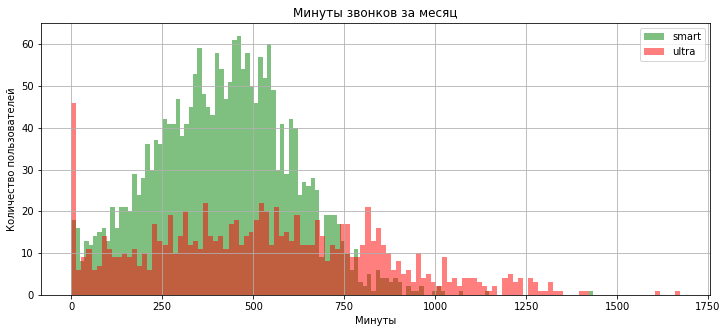

total_duration                          
                    median    mean       var     std
tariff_name                                         
smart                422.0  417.93  36219.32  190.31

,median,mean,var,std
tariff_name,,,,
ultra,518.0,526.62,100873.63,317.61


In [36]:
# Строим графики распределения минут звонков за месяц
 
graph('total_duration', 'Количество пользователей', 'Минуты', 'Минуты звонков за месяц')

Для тарифа `smart` наблюдается нормальное распределение , а вот у тарифа `ultra` большой показатель дисперсии, поэтому гистограмма растянута.

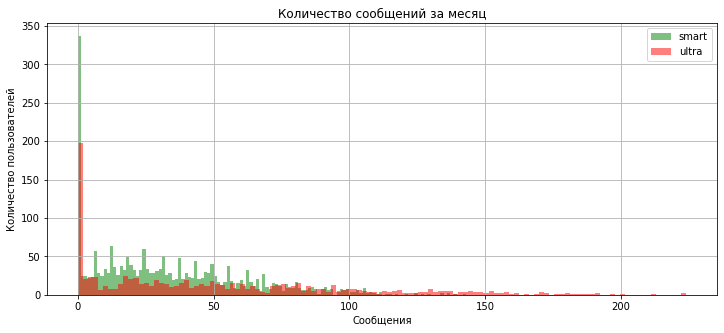

messages_total                      
                    median   mean     var    std
tariff_name                                     
smart                 28.0  33.38  796.81  28.23

,median,mean,var,std
tariff_name,,,,
ultra,38.0,49.36,2285.27,47.8


In [37]:
# Строим графики распределения отправленных сообщений за месяц
 
graph('messages_total', 'Количество пользователей', 'Сообщения', 'Количество сообщений за месяц')

Оба графика скошены вправо, это нормальное распределение. Всё в порядке.

In [38]:
def gb_col(row):
    gb_used = math.ceil(row['mb_used'] / 1024)
    return gb_used

In [39]:
data_smart['gb_used'] = data_smart.apply(gb_col, axis=1)
data_ultra['gb_used'] = data_ultra.apply(gb_col, axis=1)

/tmp/ipykernel_104/246579581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_smart['gb_used'] = data_smart.apply(gb_col, axis=1)
/tmp/ipykernel_104/246579581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ultra['gb_used'] = data_ultra.apply(gb_col, axis=1)


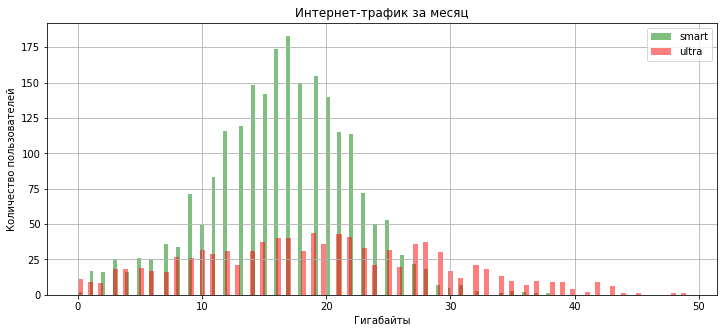

gb_used                    
             median   mean    var   std
tariff_name                            
smart            17  16.33  33.03  5.75

,median,mean,var,std
tariff_name,,,,
ultra,19,19.49,97.09,9.85


In [40]:
# Строим графики распределения потраченных гигабайт интернет-трафика за месяц

graph('gb_used', 'Количество пользователей', 'Гигабайты', 'Интернет-трафик за месяц')

Нормальное распределение у обоих тарифов, но у `ultra` снова большая дисперсия.

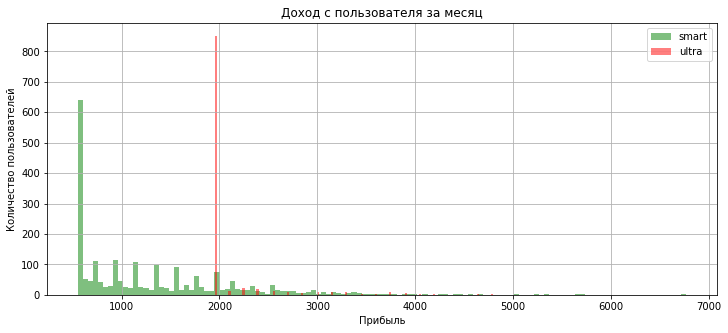

revenue                           
             median     mean        var    std
tariff_name                                   
smart        1023.0  1289.97  669785.71  818.4

,median,mean,var,std
tariff_name,,,,
ultra,1950.0,2070.15,141516.75,376.19


In [41]:
# Строим графики распределения дохода с пользователей за месяц
 
graph('revenue', 'Количество пользователей', 'Прибыль', 'Доход с пользователя за месяц')

График подтверждает выводы в предыдущем пункте.

Пользователи `ultra` в основном платят только абонентскую плату и редко превышают эту сумму, чего не скажешь о пользователях `smart` - значительная доля пользователей уходит за лимиты и переплачивает за тариф, иногда даже больше, чем стоит тариф ultra.

## Проверка гипотез

### Статистический анализ

Перед тем, как поверять гипотезы, необходимо исключить из данных выбросы. Посмотрим на выбросы при помощи диаграммы размаха.

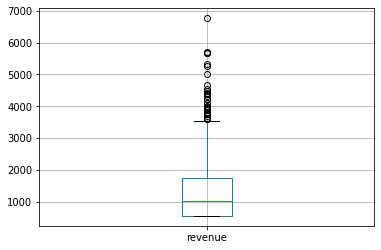

In [42]:
data_smart.boxplot(column='revenue') 
plt.show()

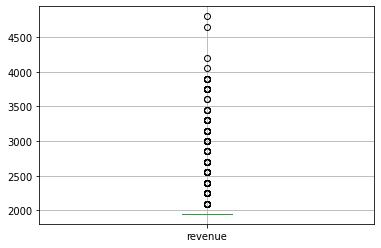

In [43]:
data_ultra.boxplot(column='revenue') 
plt.show()

Избавиться от выбросов можно, применив правило трёх сигм:

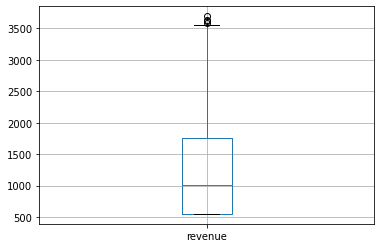

In [44]:
upper_limit_smart = np.mean(data_smart['revenue']) + 3 * np.std(data_smart['revenue'])
lower_limit_smart = np.mean(data_smart['revenue']) - 3 * np.std(data_smart['revenue'])
data_smart = data_smart.query('@upper_limit_smart >= revenue >= @lower_limit_smart')

# Проверим, ушли ли выбросы

data_smart.boxplot(column='revenue') 
plt.show()

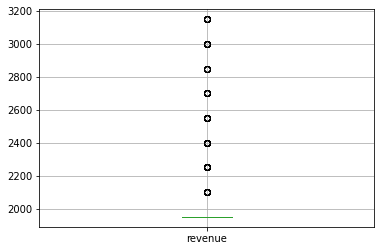

In [45]:
upper_limit_ultra = np.mean(data_ultra['revenue']) + 3 * np.std(data_ultra['revenue'])
lower_limit_ultra = np.mean(data_ultra['revenue']) - 3 * np.std(data_ultra['revenue'])
data_ultra = data_ultra.query('@upper_limit_ultra >= revenue >= @lower_limit_ultra')

data_ultra.boxplot(column='revenue') 
plt.show()

Теперь данные имеют в себе меньше выбросов.

In [46]:
data_ultra.shape

(951, 17)

### Первая гипотеза. "Смарт" против "Ультра"

- H0: Средняя выручка с пользователей тарифов «Ультра» и «Смарт» одинакова;
- H1: Средняя выручка с пользователей тарифов «Ультра» и «Смарт» различается.

Для проверки гипотезы используем ttest.

In [47]:
alpha = 0.05 # Задаем значение alpha

In [48]:
data_ultra['revenue'].mean()

2012.1451104100947

In [49]:
data_smart['revenue'].mean()

1250.4927338782925

In [50]:
results_1 = st.ttest_ind(data_ultra['revenue'], data_smart['revenue'], equal_var=False)

In [51]:
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


**Вывод:**

Средняя выручка у тарифов разная, и p-значение нулевое.

Следовательно, гипотезу о том, что средняя выручка с пользователей тарифов `smart` и `ultra` одинакова - отвергаем.

### Вторая гипотеза. Москва против регионов

- Н0: Средняя выручка с пользователей из Москвы равна средней выручке пользователей из других регионов страны;
- H1: Средние выручки пользователей из Москвы и из других регионов различаются.


In [52]:
# Обьединим обратно две таблицы в одну, но уже с удаленными выбросами

data_full_limited = pd.concat([data_ultra, data_smart])
data_full_limited

,user_id,month,calls_total,total_duration,messages_total,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,gb_used
0,1000,5.0,17.0,159.0,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0,3
1,1000,6.0,28.0,172.0,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0,23
2,1000,7.0,41.0,340.0,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0,14
3,1000,8.0,42.0,408.0,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0,14
4,1000,9.0,46.0,466.0,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8.0,0.0,0.0,17.0,11050.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,550.0,11
3210,1489,9.0,0.0,0.0,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3,950.0,17
3211,1489,10.0,0.0,0.0,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1550.0,20
3212,1489,11.0,0.0,0.0,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1150.0,18


In [53]:
# Выделяем из новой таблицы пользователей из Москвы

moscow = data_full_limited[data_full_limited['city'] == 'Москва']
moscow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 8 to 3173
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                603 non-null    int64  
 1   month                  603 non-null    float64
 2   calls_total            603 non-null    float64
 3   total_duration         603 non-null    float64
 4   messages_total         603 non-null    float64
 5   mb_used                603 non-null    float64
 6   tariff_name            603 non-null    object 
 7   city                   603 non-null    object 
 8   messages_included      603 non-null    int64  
 9   mb_per_month_included  603 non-null    int64  
 10  minutes_included       603 non-null    int64  
 11  rub_monthly_fee        603 non-null    int64  
 12  rub_per_gb             603 non-null    int64  
 13  rub_per_message        603 non-null    int64  
 14  rub_per_minute         603 non-null    int64  
 15  reven

In [54]:
# Пользователей из остальных регионов объединяем в другой датафрейм

regions = data_full_limited[data_full_limited['city'] != 'Москва']
regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2550 non-null   int64  
 1   month                  2550 non-null   float64
 2   calls_total            2550 non-null   float64
 3   total_duration         2550 non-null   float64
 4   messages_total         2550 non-null   float64
 5   mb_used                2550 non-null   float64
 6   tariff_name            2550 non-null   object 
 7   city                   2550 non-null   object 
 8   messages_included      2550 non-null   int64  
 9   mb_per_month_included  2550 non-null   int64  
 10  minutes_included       2550 non-null   int64  
 11  rub_monthly_fee        2550 non-null   int64  
 12  rub_per_gb             2550 non-null   int64  
 13  rub_per_message        2550 non-null   int64  
 14  rub_per_minute         2550 non-null   int64  
 15  reve

In [55]:
moscow['revenue'].mean()

1515.514096185738

In [56]:
regions['revenue'].mean()

1471.8745098039215

In [57]:
# Снова производим ttest

results_2 = st.ttest_ind(moscow['revenue'], regions['revenue'], equal_var=False)

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу") 

p-значение: 0.17259216873980524
Не удалось отвергнуть нулевую гипотезу


In [58]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 

При сравнении Москвы и остальных регионов вместе взятых выявлено, что средняя выручка у них примерно одинаковая, а вот p-значение оказалось слишком большим, чтобы отвергнуть нулевую гипотезу. Выручка с пользователей из Москвы примерно равна выручке со всех остальных пользователей.

## Общий вывод

В ходе проекта анализировались данные телеком-компании. Данные были достаточно "чистыми", особой предобработки не потребовалось. Для каждого абонента компании была рассчитана помесячная выручка с учетом его абонентской платы, а также платы за превышение тарифных лимитов. Проанализировано поведение пользователей внутри тарифов.

Выяснилось, что пользователи тарифа `ultra` почти никогда не платят выше абонентской платы, а вот пользователи тарифа `smart`, наоборот, часто переплачивают, особенно за интернет, т.к. количество затраченного интернет-трафика у многих из них превышает установленный тарифом лимит.

Были проверены две гипотезы:

- Выручка с пользователей тарифов smart и ultra равна;
- Выручка с пользователей из Москвы и из остальных регионов равна.   
   
Проведён t-тест и по его результатам обе гипотезы были отвергнуты.   

In [59]:
print('Общая выручка с тарифа smart:', data_smart['revenue'].sum().round(0))
print('Общая выручка с тарифа ultra:', data_ultra['revenue'].sum().round(0))

Общая выручка с тарифа smart: 2753585.0
Общая выручка с тарифа ultra: 1913550.0


**Выводы:**

1. Пользователи тарифа `ultra` почти не выходят за установленные лимиты и, как следствие, не приносят больше прибыли, чем стоимость абонентской платы. Пользователи `smart`, наоборот, приносят больше прибыли компании из-за большего количества пользователей и превышений лимитов по тарифам, особенно при оплате за интернет.
2. Тем не менее, оба тарифа приносят прибыль. Предоставленные данные говорят о том, что за 2018 год пользователи тарифа smart принесли компании **2,7 млн** рублей, а пользователи ultra - **1,9 млн** рублей.
3. Пользователи обоих тарифов практически не пользуются звонками и смс-сообщениями. В значительной степени все пользователи используют интернет.


**Рекомендации:**

Возможно, следует изменить тариф ultra, сделав его немного дешевле своей текущей стоимости, но при этом понизив лимиты интернет-трафика до уровня, который будет достаточен большинству пользователей тарифа `smart`. Тем самым удастся переманить пользователей на более дорогой тариф, а возможно привлечь таким тарифом и множество новых абонентов. Пока что тариф smart выглядит более удачным, т.к. приносит болше прибыли.